In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import mmread, mmwrite
from scipy.stats import pearsonr, spearmanr

In [27]:
projdir = '/u/home/t/terencew/project-cluo/demux_benchmark/adelus_2023/'
donors = list(np.loadtxt(f'{projdir}/txt/donors.txt', dtype=str))
samples = list(np.loadtxt(f'{projdir}/txt/samples.txt', dtype=str))
new_samples = [x.replace('MT_', 'MT-').replace('pooled_','pooled-') for x in samples]
s = samples[0]

gex_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
               'scsplit', 'scsplit_nogenos',
            'souporcell', 'souporcell_nogenos', 'demuxalot']
atac_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
               'scsplit', 'scsplit_nogenos',
            'souporcell', 'souporcell_nogenos', 'scavengers']

con_cols = ['C1', 'C2', 'I1', 'I2']

In [55]:
# gex_sings = pd.read_csv(f'{projdir}/csv/demux/singlet_gex.csv', sep='\t',
#                   header=0, index_col=0)
# atac_sings = pd.read_csv(f'{projdir}/csv/demux/singlet_atac.csv', sep='\t',
#                    header=0, index_col=0)
# gex_sings.replace({'doublet' : 'non_singlet' , 'unassigned' : 'non_singlet'}, inplace=True)
# atac_sings.replace({'doublet' : 'non_singlet' , 'unassigned' : 'non_singlet'}, inplace=True)

# tmp_gex_sings = gex_sings.copy()
# tmp_atac_sings = atac_sings.copy()
# tmp_gex_sings['inter'] = gex_sings.eq(gex_sings.iloc[:, 0], axis=0).all(1)
# tmp_atac_sings['inter'] = atac_sings.eq(atac_sings.iloc[:, 0], axis=0).all(1)
# gex_sings['inter'] = tmp_gex_sings['inter']
# atac_sings['inter'] = tmp_atac_sings['inter']
# gex_sings.shape, atac_sings.shape

In [56]:
gex = pd.read_csv(f'{projdir}/csv/demux/inter_gex_raw_donors.csv', sep='\t',
                  header=0, index_col=0)
atac = pd.read_csv(f'{projdir}/csv/demux/inter_atac_raw_donors.csv', sep='\t',
                   header=0, index_col=0)
gex.replace({'doublet' : 'non_singlet' , 'unassigned' : 'non_singlet'}, inplace=True)
atac.replace({'doublet' : 'non_singlet' , 'unassigned' : 'non_singlet'}, inplace=True)

# gex.index = [x.replace('MT_', 'MT-').replace('pooled_', 'pooled-') for x in gex.index]
# atac.index = [x.replace('MT_', 'MT-').replace('pooled_', 'pooled-') for x in atac.index]

gex.shape, atac.shape

((35201, 9), (35201, 9))

In [57]:
tmp_gex = gex.copy()
tmp_atac = atac.copy()
tmp_gex['inter'] = gex.eq(gex.iloc[:, 0], axis=0).all(1)
tmp_atac['inter'] = atac.eq(atac.iloc[:, 0], axis=0).all(1)
tmp_gex['majority'] = gex.mode(axis=1)[0]
tmp_atac['majority'] = atac.mode(axis=1)[0]

gex['majority'] = tmp_gex['majority']
gex['inter'] = tmp_gex['inter']
atac['majority'] = tmp_atac['majority']
atac['inter'] = tmp_atac['inter']

In [58]:
# tmp_cols = con_cols
# cov = 20
# condir = f'{projdir}/csv/var_consistency/gex/merged/'
# all_con_gex = pd.DataFrame(index=gex_methods, columns=tmp_cols, data=0)
# for method in gex_methods:
#     mask = gex[method] != 'non_singlet'
#     method_con = pd.read_csv(f'{condir}/{method}_cov{cov}_varcon.csv', sep='\t', header=0, index_col=0)
#     method_gex = gex[mask]
#     mask = method_con.index.isin(method_gex.index)
#     method_con = method_con[mask]
#     tmp_method_con = pd.DataFrame(method_con.sum(axis=0)[:4]).transpose()
#     all_con_gex.loc[method] = list(tmp_method_con.iloc[0])
#     print(method, method_gex.shape[0])

In [84]:
tmp_cols = con_cols
cov = 0
# cov = 20
# method = 'vireo'
method = 'inter'

condir = f'{projdir}/csv/var_consistency/gex/merged/'
mask = gex[method] != 'non_singlet'
gex_method_con = pd.read_csv(f'{condir}/{method}_cov{cov}_varcon.csv', sep='\t', header=0, index_col=0)
method_gex = gex[mask]
mask = gex_method_con.index.isin(method_gex.index)
gex_method_con = gex_method_con[mask]

### use gex 
method = 'inter'
condir = f'{projdir}/csv/var_consistency/atac/merged/'
atac_method_con = pd.read_csv(f'{condir}/{method}_cov{cov}_varcon.csv', sep='\t', header=0, index_col=0)
mask = atac_method_con.index.isin(method_gex.index)
atac_method_con = atac_method_con[mask]

In [85]:
gex_method_con

,C1,C2,I1,I2,donor
AAACAGCCAACTAGCC-1_ctrl6h,38.0,979.0,53.0,0.0,U114.rep0.uD563_U114.rep0.uD563
AAACCGCGTTGTAAAC-1_ctrl6h,17.0,423.0,26.0,0.0,U114.rep0.uD563_U114.rep0.uD563
AAACGTACACCCACCT-1_ctrl6h,19.0,504.0,20.0,0.0,U114.rep0.uD563_U114.rep0.uD563
AAATCCGGTCCAAATG-1_ctrl6h,14.0,380.0,21.0,0.0,U114.rep0.uD563_U114.rep0.uD563
AACGACAAGGTGAGAC-1_ctrl6h,10.0,292.0,20.0,0.0,U114.rep0.uD563_U114.rep0.uD563
...,...,...,...,...,...
TTTGCATTCAGGTCCA-1_pooled_endMT_4,16.0,336.0,14.0,2.0,J98.rep0.uD9
TTTGCGGAGACAAGTG-1_pooled_endMT_4,11.0,211.0,7.0,1.0,J98.rep0.uD9
TTTGGTAAGCATGACT-1_pooled_endMT_4,15.0,240.0,9.0,0.0,J98.rep0.uD9
TTTGGTAAGGATCCGC-1_pooled_endMT_4,15.0,259.0,9.0,0.0,J98.rep0.uD9


In [86]:
atac_method_con

,C1,C2,I1,I2,donor
AAACAGCCAACTAGCC-1_ctrl6h,258.0,6959.0,452.0,12.0,U114.rep0.uD563_U114.rep0.uD563
AAACCGAAGCTATGAC-1_ctrl6h,120.0,3332.0,207.0,3.0,U114.rep0.uD563_U114.rep0.uD563
AAACCGCGTTAGGTTG-1_ctrl6h,113.0,3614.0,254.0,2.0,U114.rep0.uD563_U114.rep0.uD563
AAACCGCGTTGTAAAC-1_ctrl6h,193.0,4664.0,291.0,6.0,U114.rep0.uD563_U114.rep0.uD563
AAACCGGCAAGTAAGC-1_ctrl6h,92.0,2634.0,170.0,3.0,U114.rep0.uD563_U114.rep0.uD563
...,...,...,...,...,...
TTTACGAAGCATTAGC-1_pooled_endMT_4,65.0,1470.0,113.0,8.0,D120.rep0.uD562
TTTACGCGTAAAGCAA-1_pooled_endMT_4,21.0,750.0,39.0,1.0,D120.rep0.uD562
TTTCGTCCATGCATAT-1_pooled_endMT_4,44.0,1389.0,104.0,3.0,D120.rep0.uD562
TTTGCGACACAAAGAC-1_pooled_endMT_4,70.0,2155.0,161.0,8.0,D120.rep0.uD562


In [87]:
tmp_gex_con = gex_method_con[gex_method_con.index.isin(atac_method_con.index)]
tmp_atac_con = atac_method_con[atac_method_con.index.isin(gex_method_con.index)]
tmp_gex_con.sort_index(inplace=True)
tmp_atac_con.sort_index(inplace=True)

mask = tmp_gex_con['donor'] == tmp_atac_con['donor']

tmp_gex_con = tmp_gex_con[mask]
tmp_atac_con = tmp_atac_con[mask]

tmp_gex_con.shape, tmp_atac_con.shape

/u/home/t/terencew/project-cluo/miniconda3/envs/allcools/lib/python3.7/site-packages/pandas/core/frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,


((11583, 5), (11583, 5))

In [90]:
con_corrs = pd.DataFrame(index=con_cols, columns=['pearsonr'])
for col in con_cols:    
    con_corrs.loc[col] = pearsonr(tmp_gex_con[col], tmp_atac_con[col])[0]
con_corrs

,pearsonr
C1,0.576414
C2,0.658867
I1,0.643179
I2,0.236031


In [91]:
con_corrs = pd.DataFrame(index=con_cols, columns=['spearmanr'])
for col in con_cols:    
    con_corrs.loc[col] = spearmanr(tmp_gex_con[col], tmp_atac_con[col])[0]
con_corrs

,spearmanr
C1,0.533512
C2,0.669774
I1,0.657425
I2,0.16713


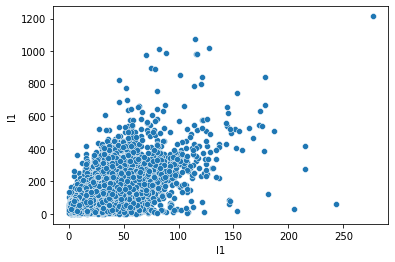

In [92]:
ax = sns.scatterplot(x=tmp_gex_con['I1'], y=tmp_atac_con['I1'])
# ax.set_xlim((0, 1000))

In [93]:
merged_con = pd.concat([tmp_gex_con['I1'], tmp_atac_con['I1']], axis=1)
merged_con.columns = ['RNA', 'ATAC']
merged_con.to_csv(f'{projdir}/csv/final_figures/figure6/figure_6c_rna_atac_i1_corr.csv',
                  sep='\t', header=True, index=True)